# Only for 2x2 images

In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

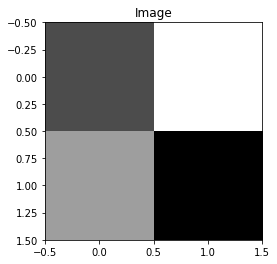

In [41]:
image = np.random.uniform(low=0, high=255, size=(2,2)).astype(int)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

In [42]:
idx = QuantumRegister(2, 'idx')
intensity = QuantumRegister(8,'intensity')
cr = ClassicalRegister(10, 'cr')
qc_image = QuantumCircuit(intensity, idx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.i(idx)
qc_image.h(8)
qc_image.h(9)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(2)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            qc_image.ccx(num_qubits-1, num_qubits-2, idx)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
qc_image.measure(range(10),range(10))
# qc_image.draw()

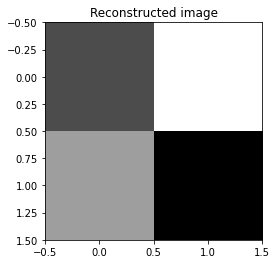

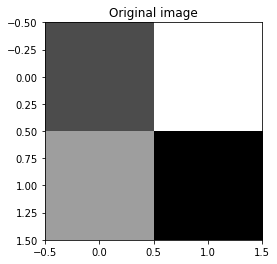

[123. 210. 163.  86.] 
 [123 210 163  86]


In [43]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
# plot_histogram(counts_neqr)
# plt.show()
# print(counts_neqr)
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:2], 2), int(item[2:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()
print(out_image.flatten(), '\n', image.flatten())

# Complement Color Transformation

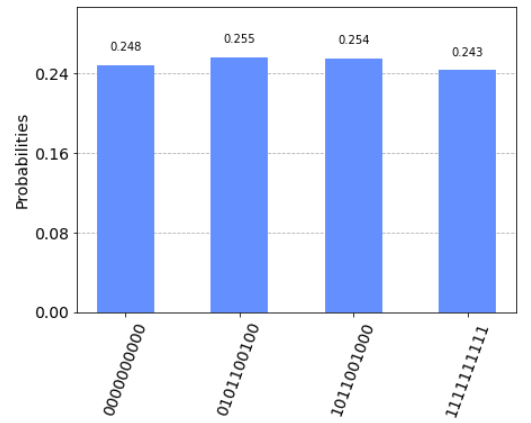

In [44]:
idx = QuantumRegister(2, 'idx')
intensity = QuantumRegister(8,'intensity')
cr = ClassicalRegister(10, 'cr')
qc_image = QuantumCircuit(intensity, idx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.x(idx)
qc_image.h(8)
qc_image.h(9)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(2)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            qc_image.ccx(num_qubits-1, num_qubits-2, idx)
    if i!=len(input_im) - 1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
qc_image.measure(range(10),range(10))
# qc_image.draw()

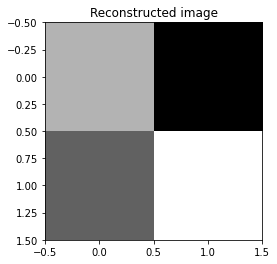

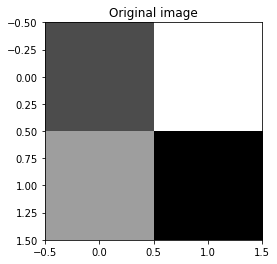

In [45]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:2], 2), int(item[2:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

# *More than 2 qubits*

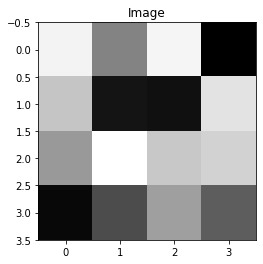

In [47]:
image = np.random.uniform(low=0, high=255, size=(4,4)).astype(int)
plt.imshow(image, cmap='gray')
plt.title('Image')
plt.show()

In [48]:
def multicnot(qc_image, TOWHERE):
    qc_image.ccx(-1, -2, -5)
    qc_image.ccx(-3, -5, -6)
    qc_image.ccx(-4, -6, -7)
    for idx in TOWHERE:
        qc_image.cx(-7, idx)
    qc_image.ccx(-4, -6, -7)
    qc_image.ccx(-3, -5, -6)
    qc_image.ccx(-1, -2, -5)
    
indx = QuantumRegister(4, 'idx')
intensity = QuantumRegister(8,'intensity')
ancilas = QuantumRegister(3, 'ancila')
cr = ClassicalRegister(12, 'cr')
qc_image = QuantumCircuit(intensity, ancilas, indx, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.i(idx)
for idx in range(indx.size):
    qc_image.h(intensity.size+ancilas.size+idx)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(4)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    do_mult_with = []
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            do_mult_with.append(idx)
    if do_mult_with:
        multicnot(qc_image, do_mult_with)
    if i!=len(input_im)-1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
qc_image.measure(range(8),range(8))
qc_image.measure(range(11,15),range(8,12))
# qc_image.draw()

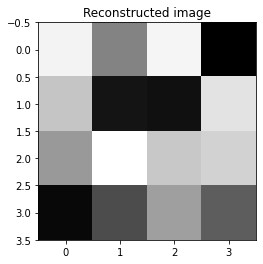

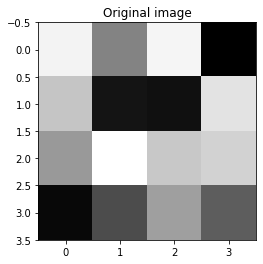

In [49]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
# plot_histogram(counts_neqr)
plt.show()
# print(counts_neqr)
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:4], 2), int(item[4:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

# And/or Color Transformation

In [50]:
def multicnot(qc_image, TOWHERE):
    qc_image.ccx(-2, -3, -6)
    qc_image.ccx(-4, -6, -7)
    qc_image.ccx(-5, -7, -8)
    for idx in TOWHERE:
        qc_image.cx(-7, idx)
    qc_image.ccx(-3, -7, -8)
    qc_image.ccx(-4, -6, -7)
    qc_image.ccx(-2, -3, -6)
    
indx = QuantumRegister(4, 'idx')
intensity = QuantumRegister(8,'intensity')
ancilas = QuantumRegister(3, 'ancila')
ancila_c = QuantumRegister(1, 'ancila_c')
cr = ClassicalRegister(12, 'cr')
qc_image = QuantumCircuit(intensity, ancilas, indx, ancila_c, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
for idx in range(intensity.size):
    qc_image.i(idx)
for idx in range(indx.size):
    qc_image.h(intensity.size+ancilas.size+idx)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(4)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    do_mult_with = []
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            do_mult_with.append(idx)
    if do_mult_with:
        multicnot(qc_image, do_mult_with)
    if i!=len(input_im)-1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
    qc_image.ccx(0,1,-1)
    qc_image.swap(1,-1)
    qc_image.barrier()
qc_image.measure(range(8),range(8))
qc_image.measure(range(11,15),range(8,12))
# qc_image.draw()

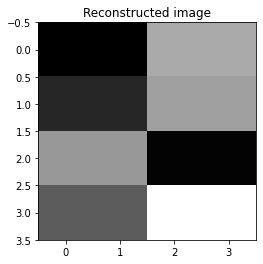

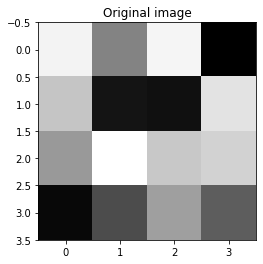

In [51]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
# plot_histogram(counts_neqr)
# plt.show()
# print(counts_neqr)
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:4], 2), int(item[4:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

# OR

In [52]:
def multicnot(qc_image, TOWHERE):
    qc_image.ccx(-2, -3, -6)
    qc_image.ccx(-4, -6, -7)
    qc_image.ccx(-5, -7, -8)
    for idx in TOWHERE:
        qc_image.cx(-7, idx)
    qc_image.ccx(-3, -7, -8)
    qc_image.ccx(-4, -6, -7)
    qc_image.ccx(-2, -3, -6)
    
indx = QuantumRegister(4, 'idx')
intensity = QuantumRegister(8,'intensity')
ancilas = QuantumRegister(3, 'ancila')
ancila_c = QuantumRegister(1, 'ancila_c')
cr = ClassicalRegister(12, 'cr')
qc_image = QuantumCircuit(intensity, ancilas, indx, ancila_c, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()
qc_image.x(intensity.size+ancilas.size+indx.size)
for idx in range(intensity.size):
    qc_image.i(idx)
for idx in range(indx.size):
    qc_image.h(intensity.size+ancilas.size+idx)
for i, pixel in enumerate(input_im):
    pixel_bin = "{0:b}".format(pixel).zfill(8)
    position = "{0:b}".format(i).zfill(4)
    for j, coord in enumerate(position):
        if int(coord):
            qc_image.x(qc_image.num_qubits-j-1)
    do_mult_with = []
    for idx, px_value in enumerate(pixel_bin[::-1]):
        if(px_value=='1'):
            do_mult_with.append(idx)
    if do_mult_with:
        multicnot(qc_image, do_mult_with)
    if i!=len(input_im)-1:
        for j, coord in enumerate(position):
            if int(coord):
                qc_image.x(qc_image.num_qubits-j-1)
    qc_image.barrier()
    qc_image.ccx(0,1,-1)
    qc_image.swap(1,-1)
    qc_image.barrier()
qc_image.measure(range(8),range(8))
qc_image.measure(range(11,15),range(8,12))
# qc_image.draw()

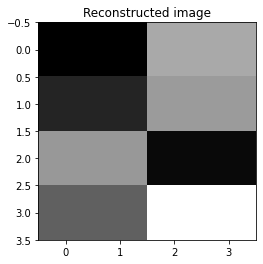

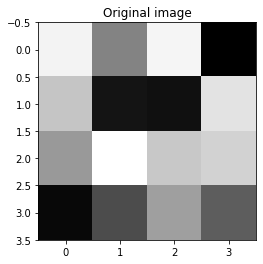

In [53]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
# plot_histogram(counts_neqr)
# plt.show()
# print(counts_neqr)
out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:4], 2), int(item[4:],2)))
out_image = np.zeros((1, len(input_im)))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (image.shape))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

# Upscaling (69/177)

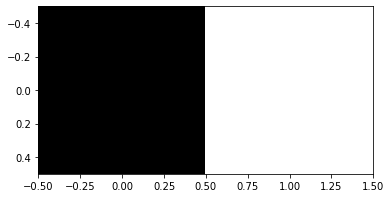

In [54]:
image = np.array([0,1]).reshape(1,2)
color_bit_range = 1
plt.imshow(image, cmap = 'gray')
plt.show()

In [55]:
import math
ry = 5
rx = 3
h_prime = int(np.ceil(math.log(ry*image.shape[0],2)))
w_prime = int(np.ceil(math.log(rx*image.shape[1],2)))
print(h_prime, w_prime)
h = int(np.ceil(math.log(image.shape[0],2)))
if not h: h = 1
w = int(np.ceil(math.log(image.shape[1],2)))
print('from {} to {}'.format((image.shape),(image.shape[0]*ry, image.shape[1]*rx)))
print('for each 1x1 pixel shape is {}x{}'.format(ry, rx))

3 3
from (1, 2) to (5, 6)
for each 1x1 pixel shape is 5x3


In [56]:
from qiskit.extensions import XGate
from qiskit.circuit.library.standard_gates.ry import RYGate
    
indx = QuantumRegister(h+w, 'idx')
indx_prime = QuantumRegister(h_prime+w_prime, 'idx_prime')
intensity = QuantumRegister(color_bit_range,'intensity')
intensity_prime = QuantumRegister(color_bit_range,'intensity_prime')
cr = ClassicalRegister(intensity_prime.size + indx_prime.size, 'cr')
qc_image = QuantumCircuit(intensity, indx, intensity_prime, indx_prime, cr)
num_qubits = qc_image.num_qubits
input_im = image.copy().flatten()

#how many bits is used for coding classical position? h and w
    
for idx in range(indx_prime.size):
    qc_image.h(indx.size + intensity.size + intensity_prime.size + idx)
    
qc_image.barrier()
    
for i, pixel in enumerate(input_im):
    pre_controls = []
    pixel_bin = "{0:b}".format(pixel).zfill(color_bit_range)
    for j, intens in enumerate(pixel_bin):
        if int(intens):
            qc_image.x(intensity[j])
    position_bin = "{0:b}".format(i).zfill(h+w)
    for j, coord in enumerate(position_bin):
        if int(coord):
            qc_image.x(indx[j])
            pre_controls.append(indx[j])
                        
    for x_pos in range(ry):
        for y_pos in range(rx*(i), rx*(1+i)):
            controls = list(range(color_bit_range))
            controls.extend(pre_controls)
            x_pos_bit = "{0:b}".format(x_pos).zfill(h_prime)
            for j, coord in enumerate(x_pos_bit):
                if int(coord):
                    qc_image.x(indx_prime[j])
                    controls.append(indx_prime[j])
            y_pos_bit = "{0:b}".format(y_pos).zfill(w_prime)
            for j, coord in enumerate(y_pos_bit):
                if int(coord):
                    qc_image.x(indx_prime[h_prime+j])
                    controls.append(indx_prime[h_prime+j])
            xg = XGate(None).control(len(controls))
            controls.append(indx.size + intensity.size)
            qc_image.append(xg, controls)
            
            if i!=len(input_im):
                for j, coord in enumerate(x_pos_bit):
                    if int(coord):
                        qc_image.x(indx_prime[j])
                for j, coord in enumerate(y_pos_bit):
                    if int(coord):
                        qc_image.x(indx_prime[h_prime+j])
                qc_image.barrier()
    
for j, coord in enumerate(x_pos_bit):
    if int(coord):
        qc_image.x(indx_prime[j])
for j, coord in enumerate(y_pos_bit):
    if int(coord):
        qc_image.x(indx_prime[h_prime+j])
qc_image.barrier()

    
qc_image.measure(range(intensity.size+indx.size, intensity.size+indx.size+intensity_prime.size+indx_prime.size),
                 range(intensity_prime.size+indx_prime.size))
# qc_image.draw()

░       ░                 ░                 ░      »
      intensity_0: ──────░───■───░────────■────────░────────■────────░──────»
                         ░   │   ░        │        ░        │        ░      »
            idx_0: ──────░───┼───░────────┼────────░────────┼────────░──────»
                         ░   │   ░        │        ░        │        ░      »
            idx_1: ──────░───┼───░────────┼────────░────────┼────────░──────»
                         ░ ┌─┴─┐ ░      ┌─┴─┐      ░      ┌─┴─┐      ░      »
intensity_prime_0: ──────░─┤ X ├─░──────┤ X ├──────░──────┤ X ├──────░──────»
                   ┌───┐ ░ └───┘ ░      └─┬─┘      ░      └─┬─┘      ░      »
      idx_prime_0: ┤ H ├─░───────░────────┼────────░────────┼────────░──────»
                   ├───┤ ░       ░        │        ░        │        ░      »
      idx_prime_1: ┤ H ├─░───────░────────┼────────░────────┼────────░──────»
                   ├───┤ ░       ░        │        ░        │        ░ ┌───┐»
      idx_prime_2: ┤ H ├─░───────░────────┼────────░────────┼────────░─┤ X ├»
                   ├───┤ ░       ░        │        ░        │        ░ └───┘»
      idx_prime_3: ┤ H ├─░───────░────────┼────────░────────┼────────░──────»
                   ├───┤ ░       ░        │        ░ ┌───┐  │  ┌───┐ ░      »
      idx_prime_4: ┤ H ├─░───────░────────┼────────░─┤ X ├──■──┤ X ├─░──────»
                   ├───┤ ░       ░ ┌───┐  │  ┌───┐ ░ └───┘     └───┘ ░      »
      idx_prime_5: ┤ H ├─░───────░─┤ X ├──■──┤ X ├─░─────────────────░──────»
                   └───┘ ░       ░ └───┘     └───┘ ░                 ░      »
             cr: 7/═════════════════════════════════════════════════════════»
                                                                            »
«                              ░                 ░                 ░           »
«      intensity_0: ──■────────░────────■────────░────────■────────░────────■──»
«                     │        ░        │        ░        │        ░        │  »
«            idx_0: ──┼────────░────────┼────────░────────┼────────░────────┼──»
«                     │        ░        │        ░        │        ░        │  »
«            idx_1: ──┼────────░────────┼────────░────────┼────────░────────┼──»
«                   ┌─┴─┐      ░      ┌─┴─┐      ░      ┌─┴─┐      ░      ┌─┴─┐»
«intensity_prime_0: ┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├»
«                   └─┬─┘      ░      └─┬─┘      ░      └─┬─┘      ░      └─┬─┘»
«      idx_prime_0: ──┼────────░────────┼────────░────────┼────────░────────┼──»
«                     │        ░        │        ░        │        ░ ┌───┐  │  »
«      idx_prime_1: ──┼────────░────────┼────────░────────┼────────░─┤ X ├──■──»
«                     │  ┌───┐ ░ ┌───┐  │  ┌───┐ ░ ┌───┐  │  ┌───┐ ░ └───┘     »
«      idx_prime_2: ──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░───────────»
«                        └───┘ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘ ░           »
«      idx_prime_3: ───────────░────────┼────────░────────┼────────░───────────»
«                              ░        │        ░ ┌───┐  │  ┌───┐ ░           »
«      idx_prime_4: ───────────░────────┼────────░─┤ X ├──■──┤ X ├─░───────────»
«                              ░ ┌───┐  │  ┌───┐ ░ └───┘     └───┘ ░           »
«      idx_prime_5: ───────────░─┤ X ├──■──┤ X ├─░─────────────────░───────────»
«                              ░ └───┘     └───┘ ░                 ░           »
«             cr: 7/═══════════════════════════════════════════════════════════»
«                                                                              »
«                         ░                 ░                 ░                »
«      intensity_0: ──────░────────■────────░────────■────────░────────■───────»
«                         ░        │        ░        │        ░        │       »
«            idx_0: ──────░────────┼────────░────────┼────────░────────┼───────»
«                         ░        │        

{'0011011': 15725, '1001110': 15735, '0111101': 15547, '0001100': 15496, '1110000': 15536, '0110100': 15492, '0101100': 15459, '1111010': 15573, '1000100': 15512, '0000010': 15779, '0100100': 15506, '1001011': 15671, '1100000': 15522, '0011110': 15675, '0001000': 15841, '1010100': 15728, '0011000': 15407, '0101110': 15653, '1000011': 15718, '1111000': 15723, '1101000': 15524, '0010100': 15847, '1101010': 15891, '1011000': 15463, '0000110': 15608, '1000000': 15823, '1111110': 15541, '0111000': 15638, '0101010': 15681, '1000111': 15543, '0101000': 15662, '1010000': 15683, '0010011': 15571, '0100110': 15678, '1010111': 15554, '0011101': 15690, '0001010': 15620, '1110010': 15678, '1011011': 15669, '1110100': 15854, '1100110': 15576, '1001101': 15529, '0100010': 15698, '0111110': 15536, '0110011': 15714, '0000100': 15376, '0100000': 15631, '1101110': 15524, '0010000': 15694, '1100100': 15729, '0000000': 15622, '1111100': 15675, '0110111': 15526, '1110110': 15699, '0111011': 15589, '0001110'

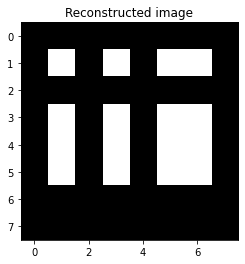

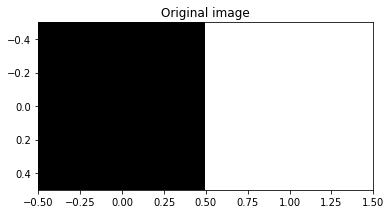

In [58]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=1000000)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print(counts_neqr)
print(len(counts_neqr))

out_pixels = []
for item in counts_neqr:
    out_pixels.append((int(item[0:6], 2), int(item[6:],2)))
out_image = np.zeros((1, 64))
for pixel in out_pixels:
    out_image[0][pixel[0]] = pixel[1]
out_image = np.reshape(out_image, (8,8))
plt.imshow(out_image, cmap = 'gray')
plt.title('Reconstructed image')
plt.show()
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()